In [111]:
import pandas as pd

url = 'https://raw.githubusercontent.com/VaibhavMah/gallstone-prediction/refs/heads/main/gallstone_.csv'
df = pd.read_csv(url)

print("✅ Dataset loaded successfully!")
df.head()


df = pd.read_csv(file_path)

✅ Dataset loaded successfully!


In [112]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split



from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix





In [113]:
df.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [114]:
df.describe()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


In [115]:
target_counts = df['Gallstone Status'].value_counts()
print(target_counts)

Gallstone Status
0    161
1    158
Name: count, dtype: int64


In [116]:
rows, cols = df.shape
print(f"{rows} rows and {cols} cols")
print(f'Size:{df.size}')

319 rows and 39 cols
Size:12441


# **EDA**

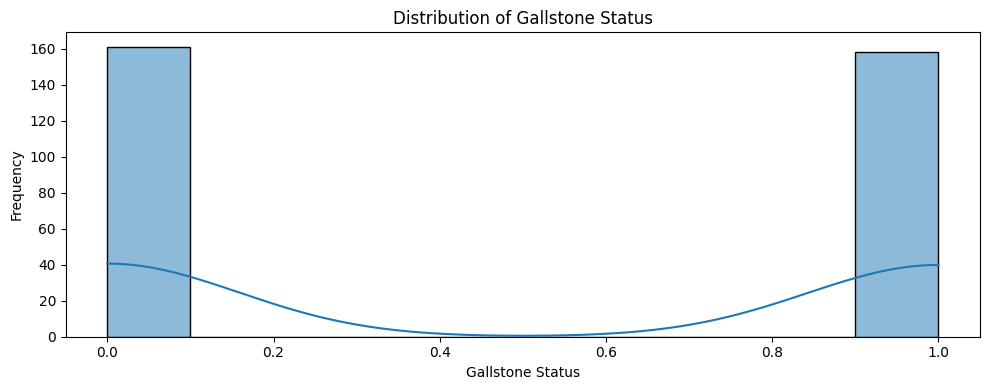

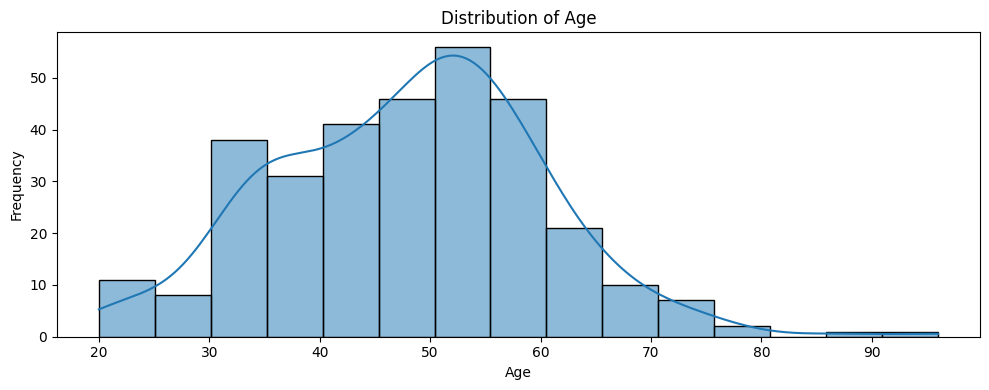

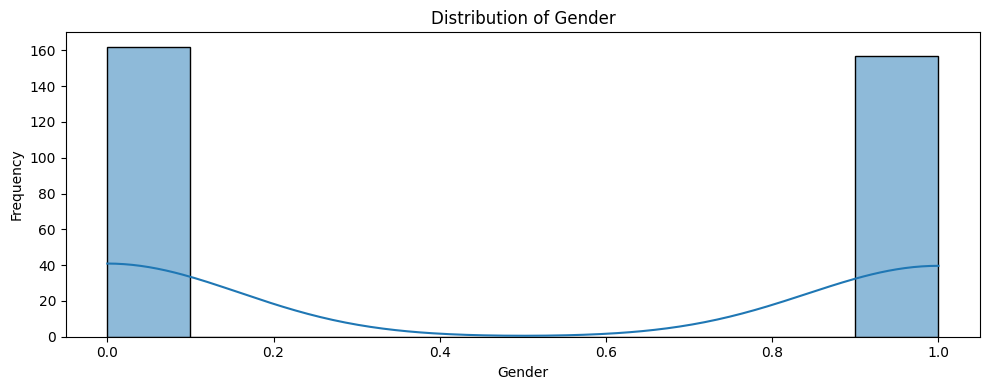

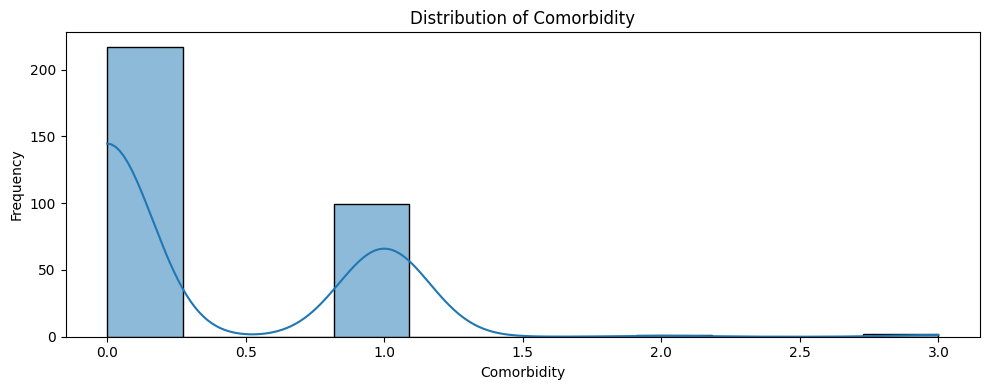

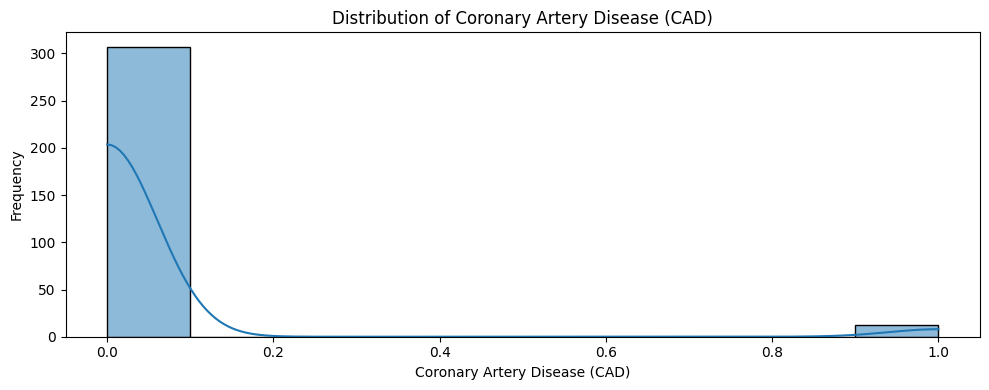

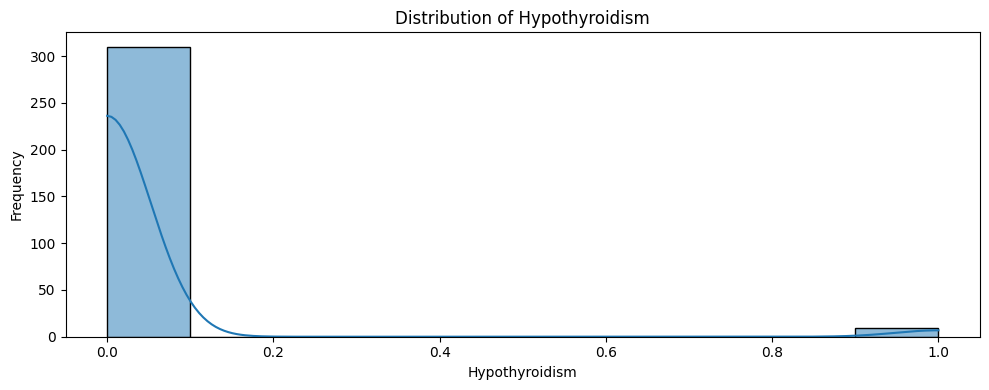

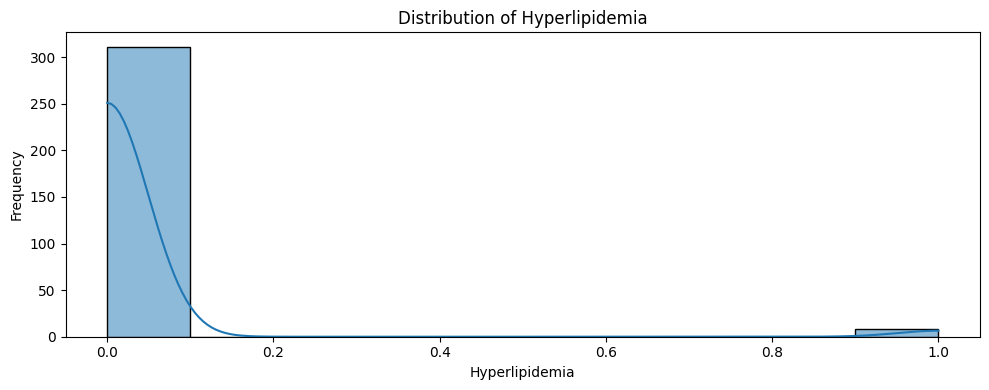

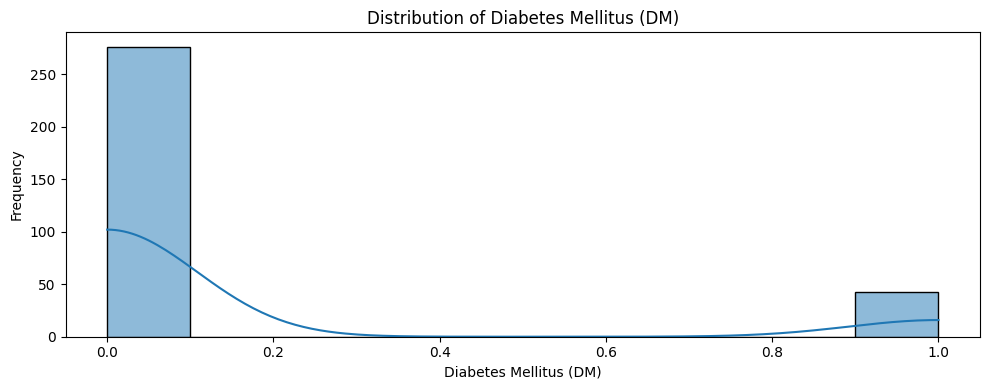

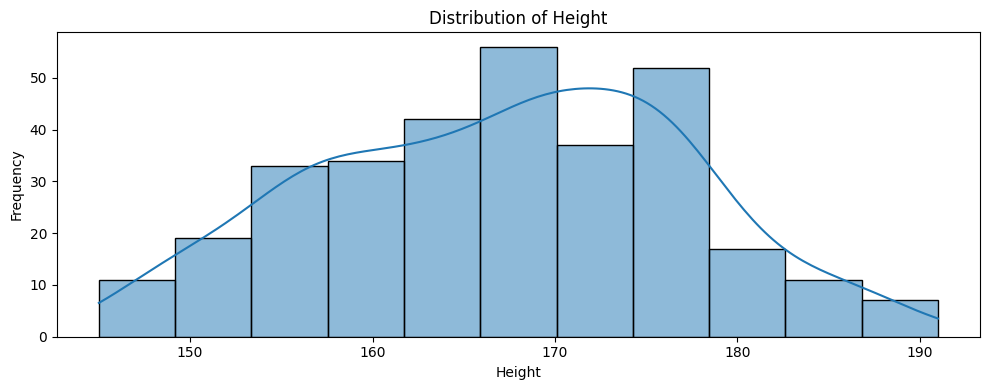

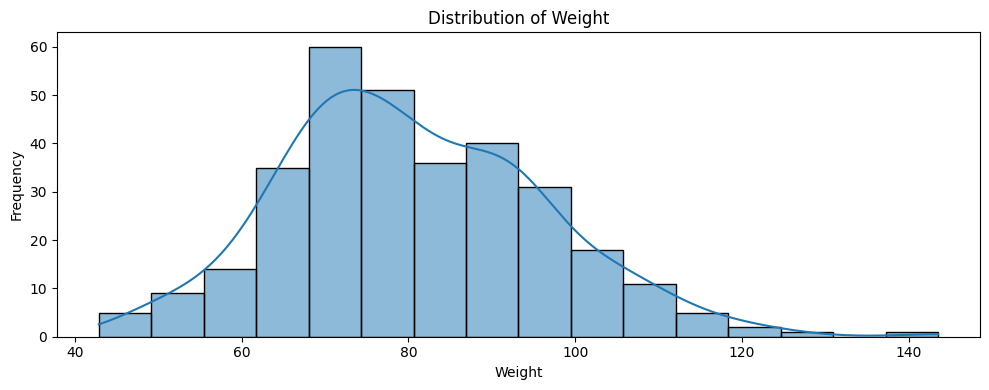

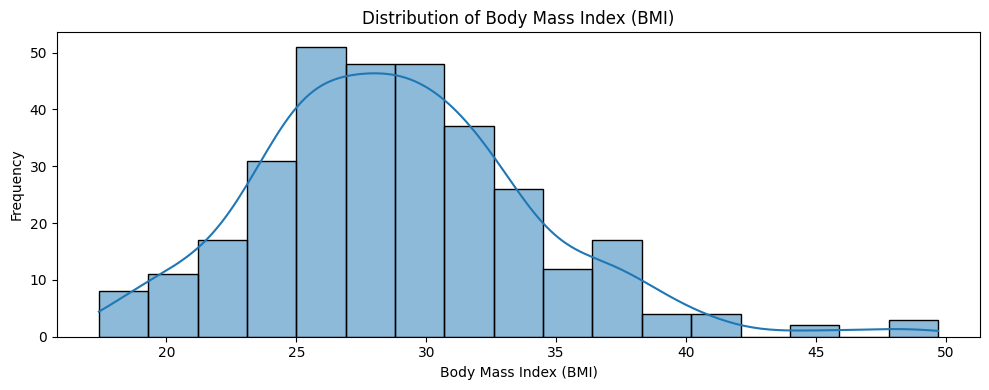

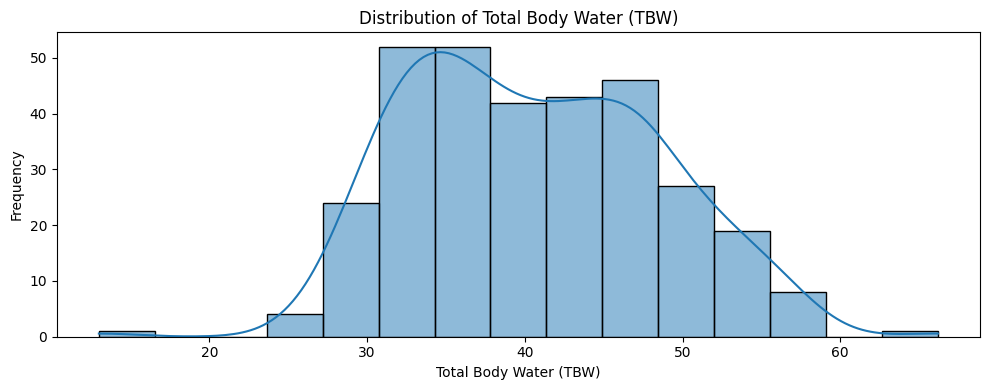

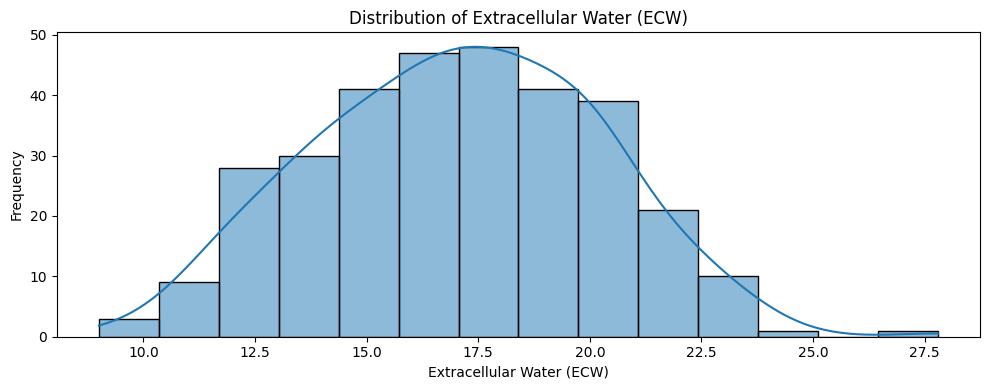

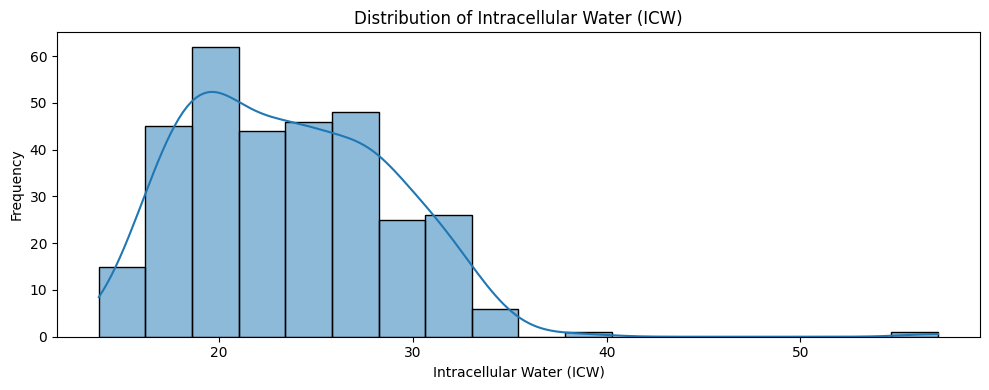

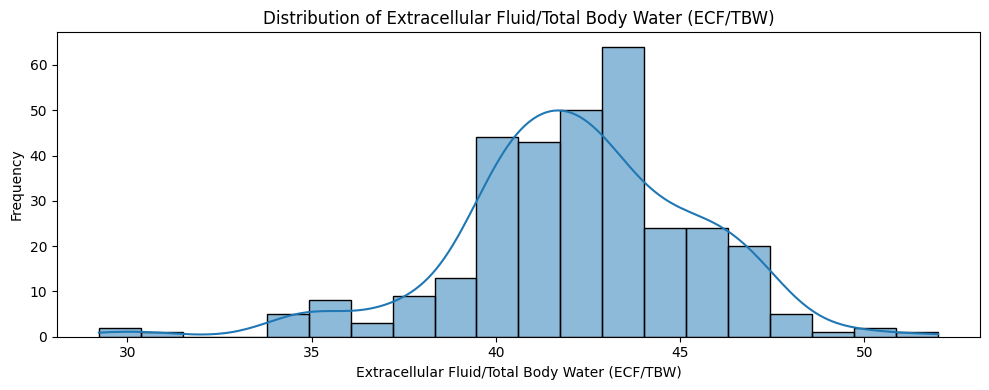

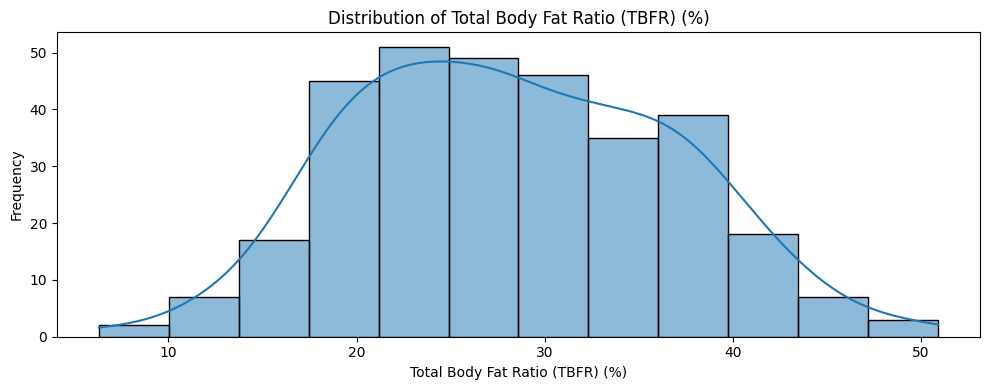

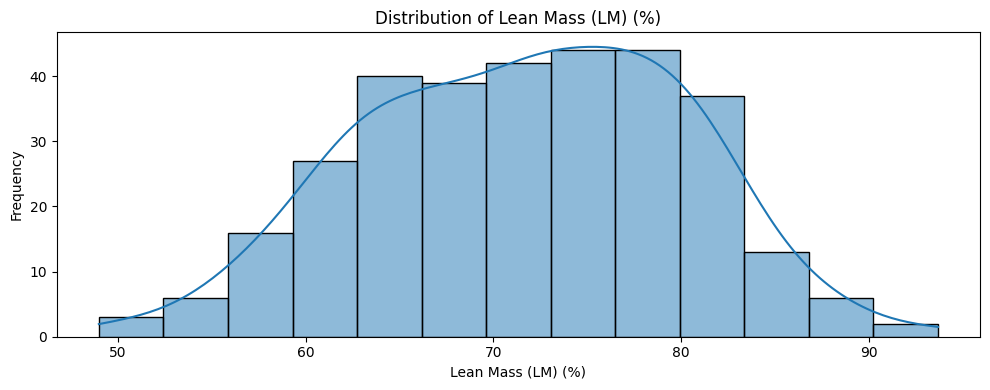

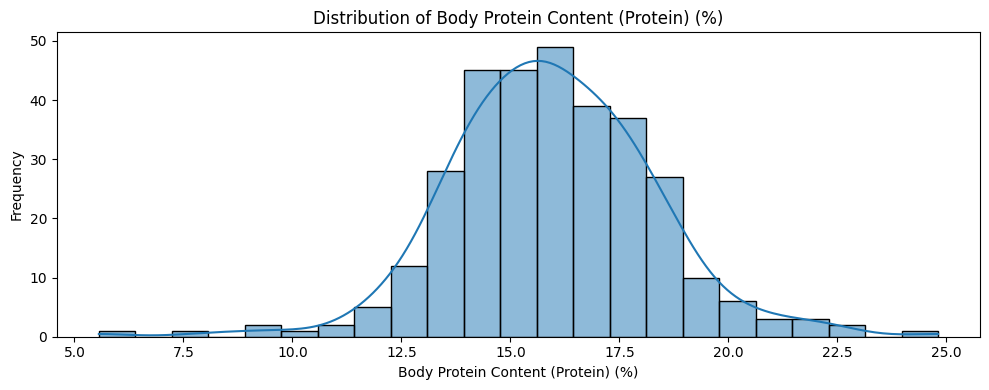

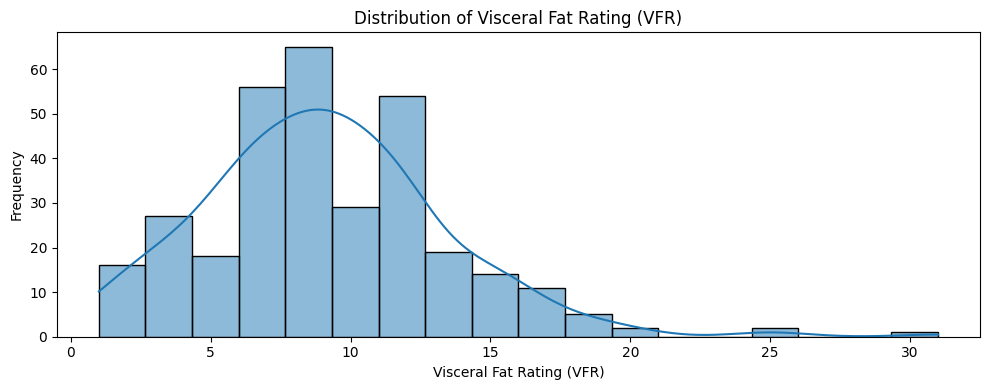

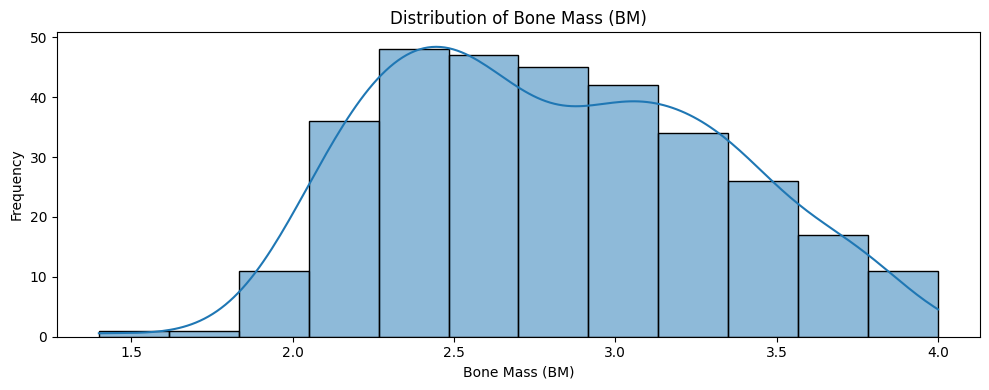

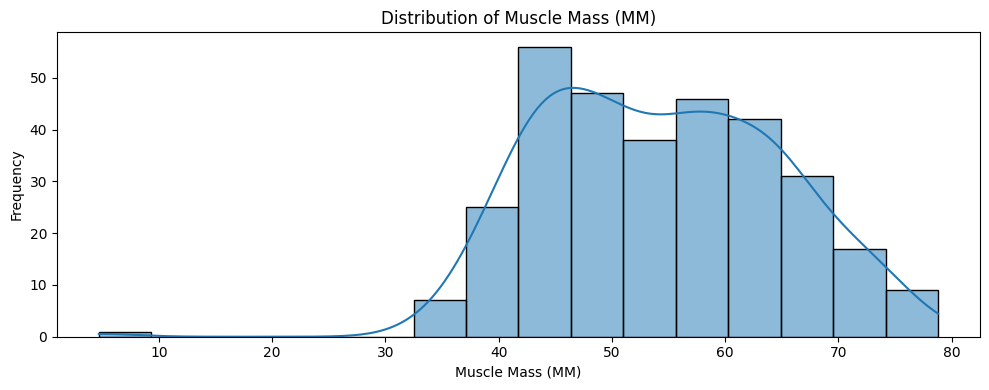

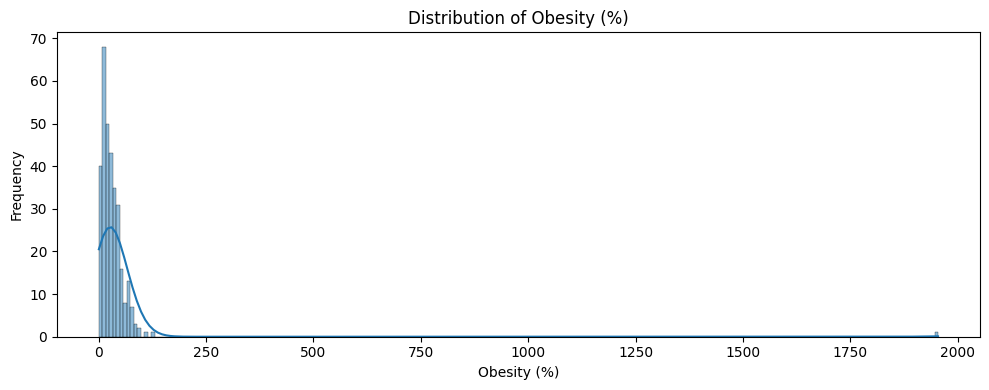

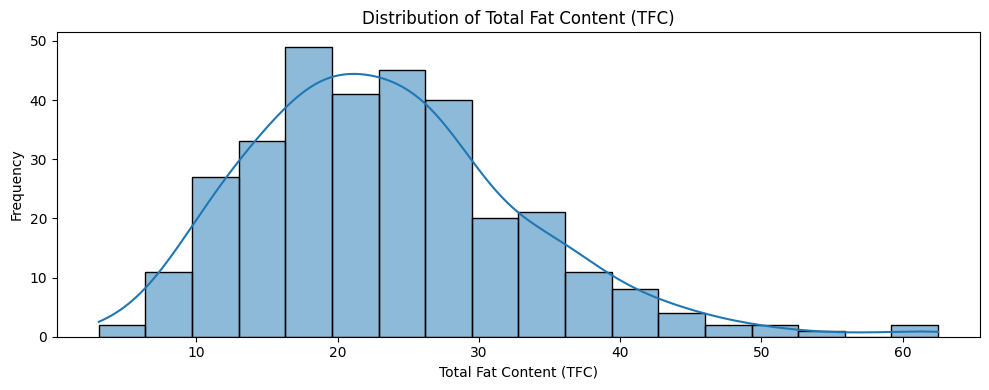

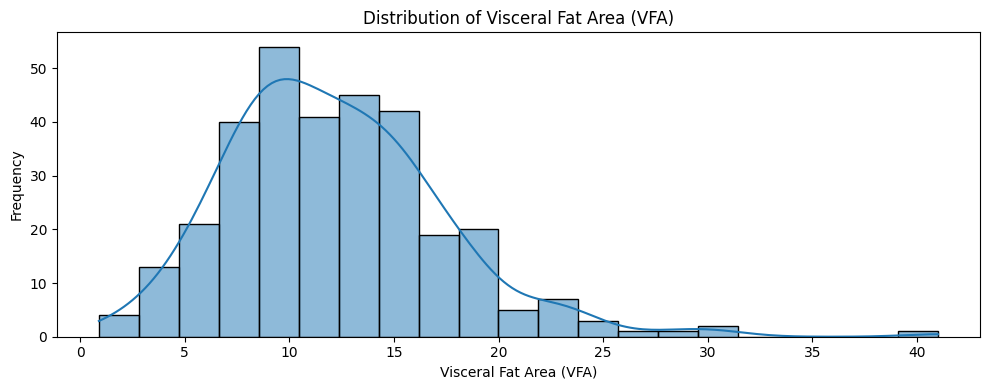

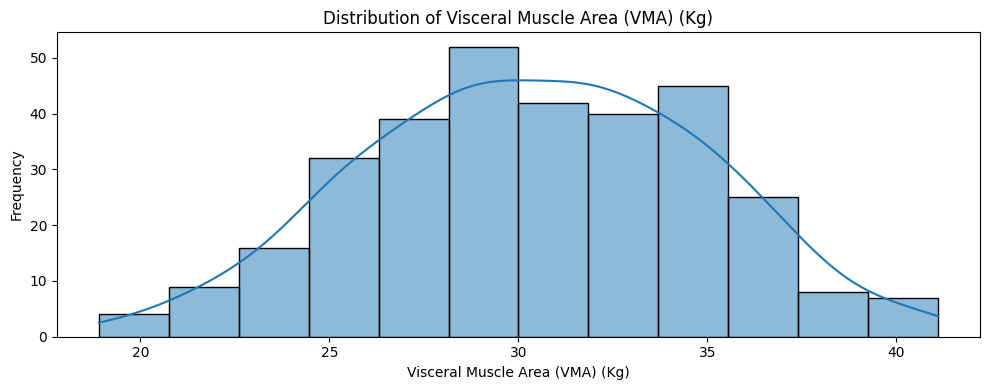

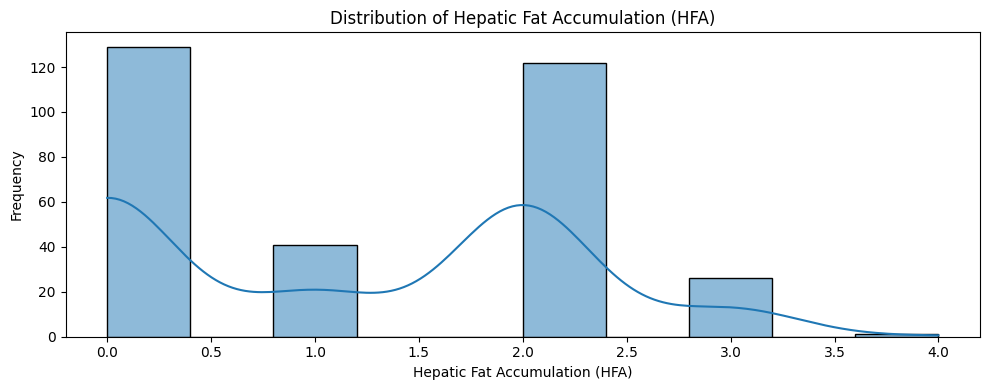

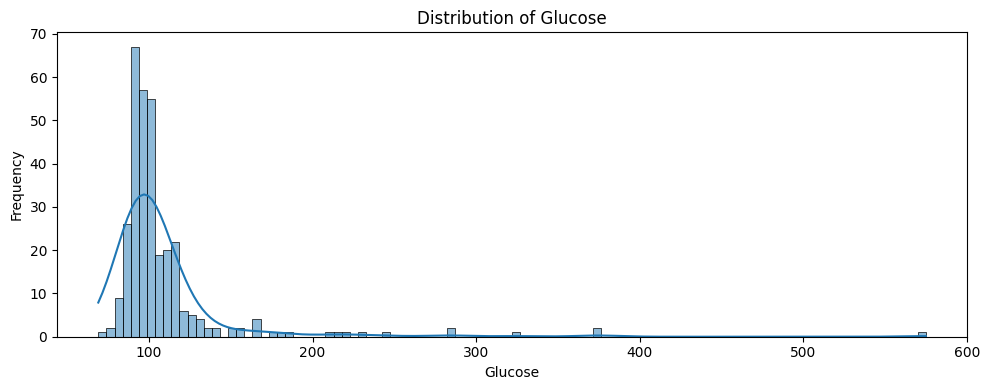

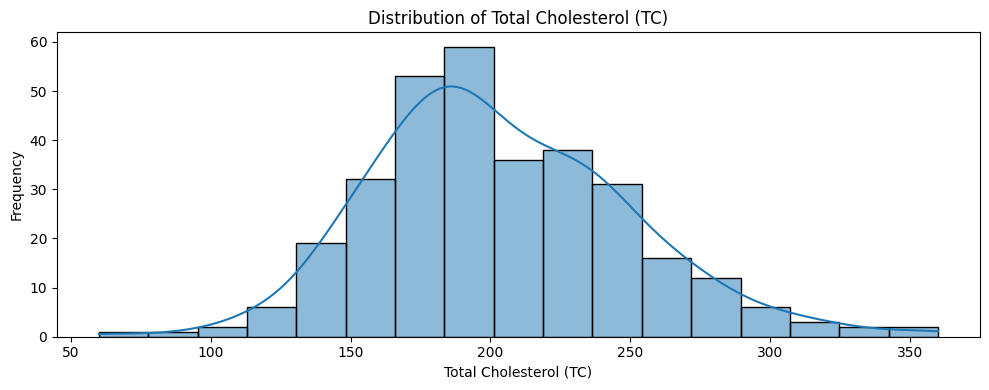

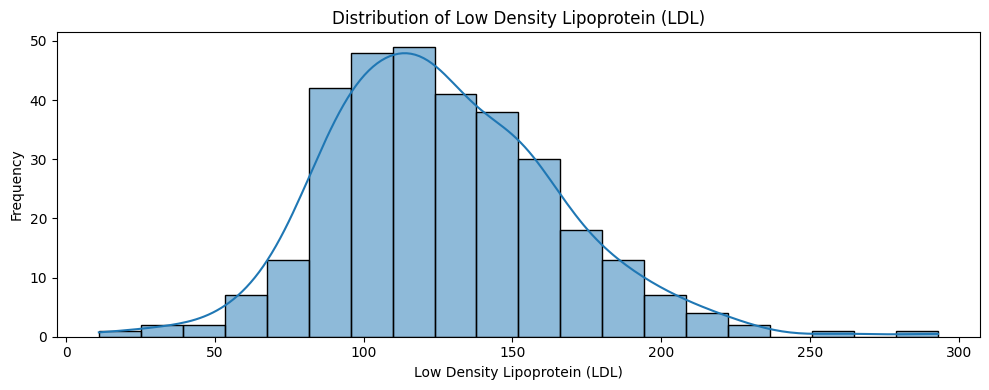

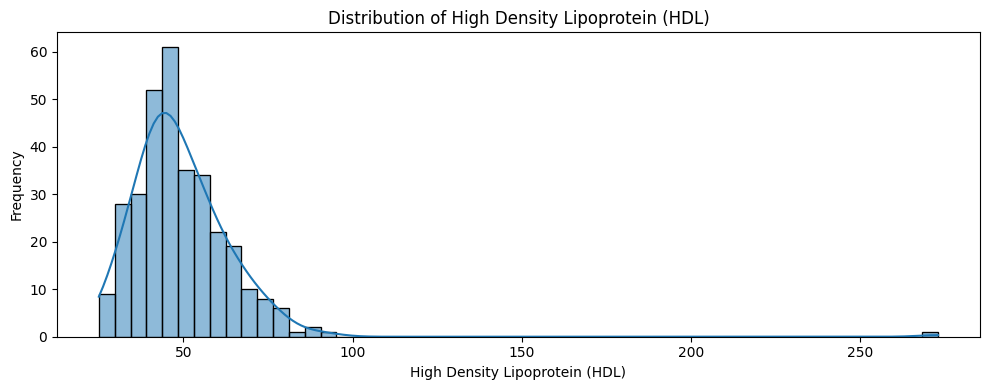

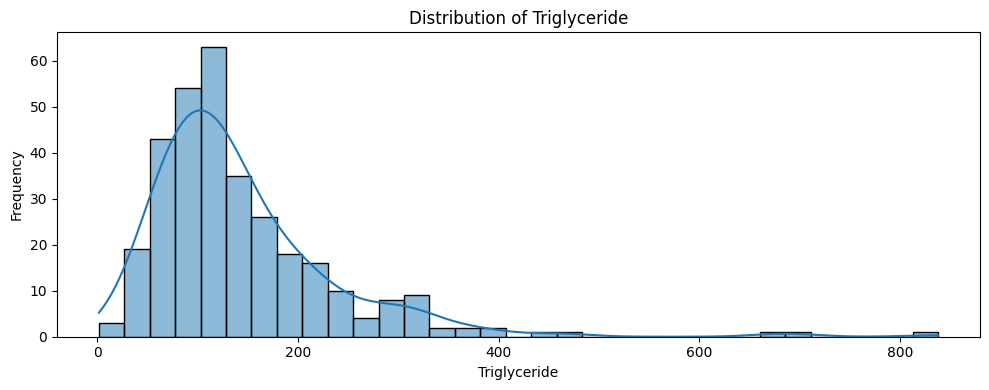

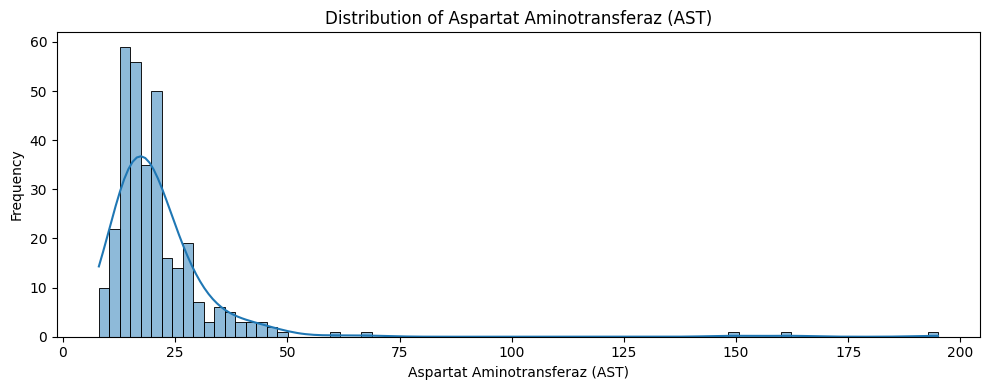

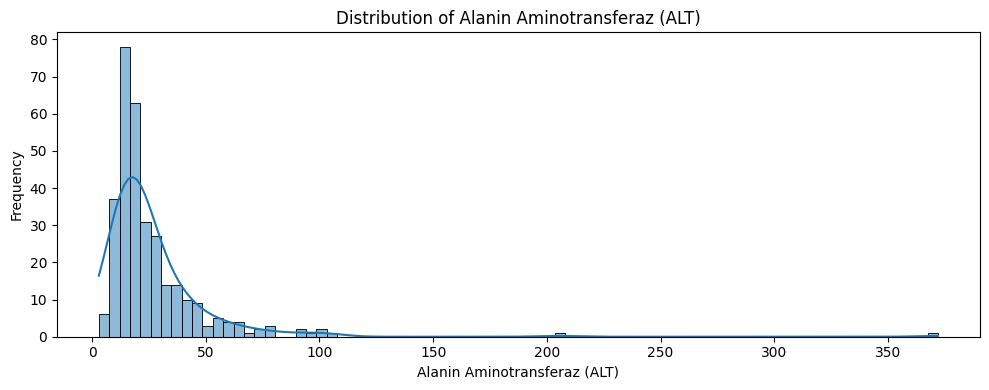

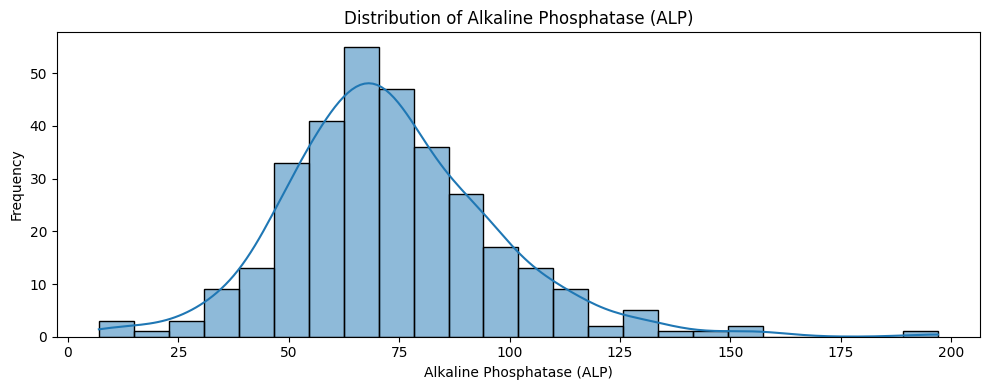

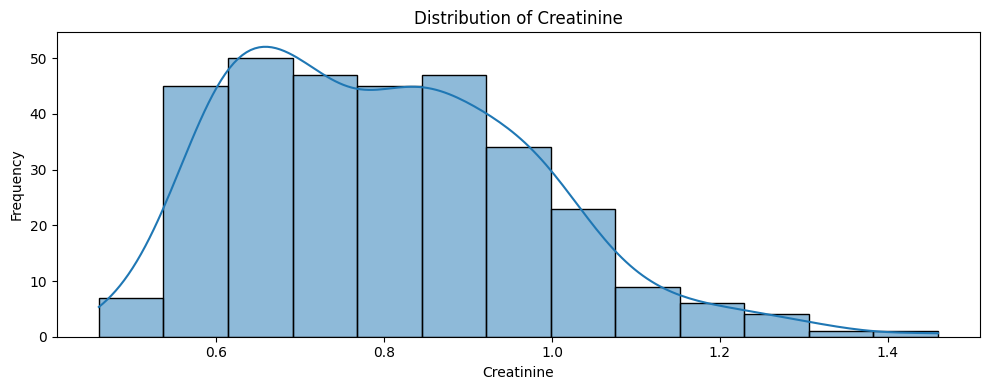

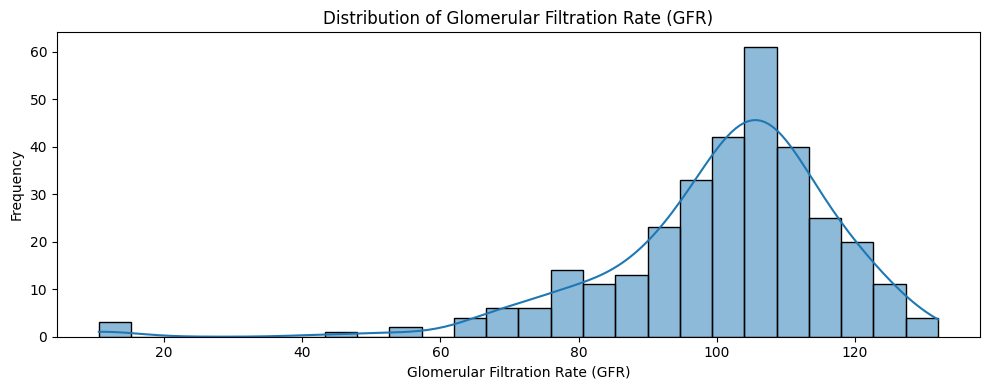

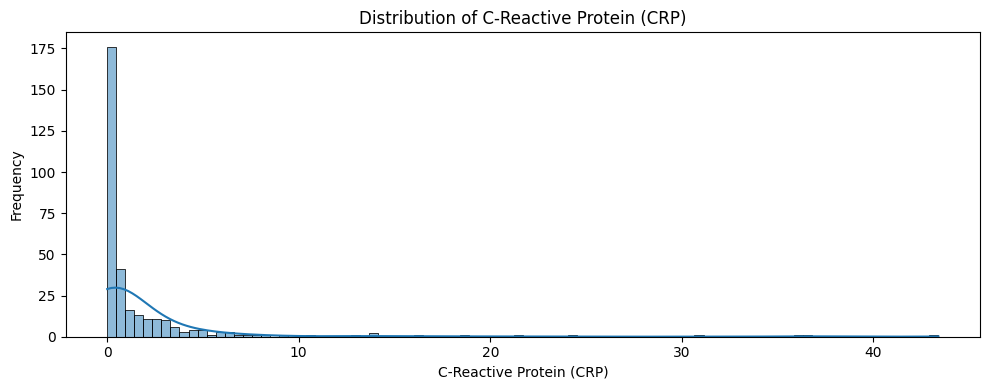

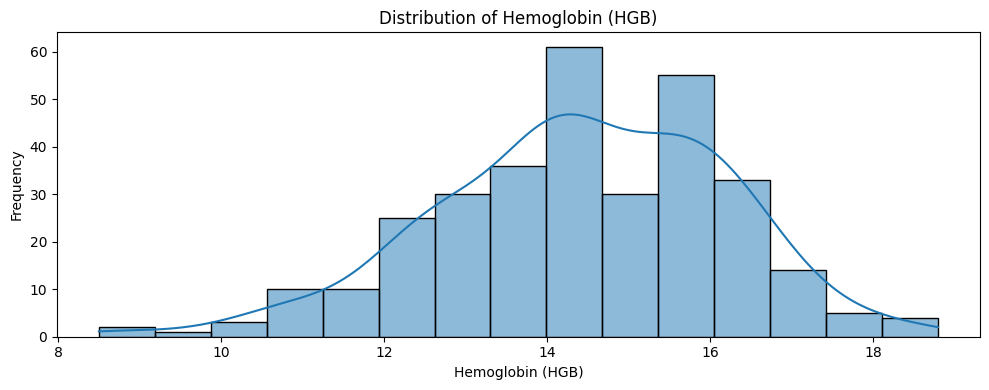

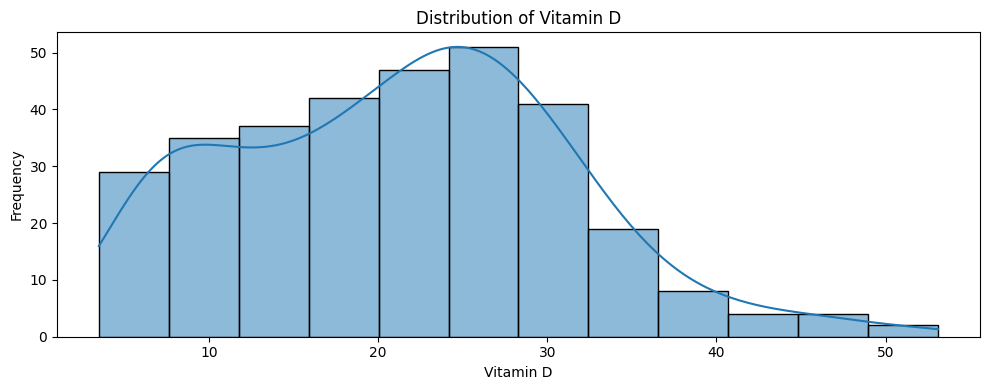

In [117]:
num_columns = df.select_dtypes("number")
for col in num_columns:
    plt.figure(figsize=(10,4))
    sns.histplot(num_columns[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [118]:
high_mm = df[df['Muscle Mass (MM)'] > 70]
low_mm = df[df['Muscle Mass (MM)'] < 20]
print(f"High MM outliers: {len(high_mm)}\nLow MM outliers: {len(low_mm)}")

High MM outliers: 25
Low MM outliers: 1


In [119]:
df_corr = pd.DataFrame(df.corr()['Gallstone Status'].sort_values(ascending=False).reset_index())
df_corr.columns = ['Feature','corr']
df_corr.head(15)

,Feature,corr
0,Gallstone Status,1.000000
1,C-Reactive Protein (CRP),0.281995
2,Total Body Fat Ratio (TBFR) (%),0.225470
3,Total Fat Content (TFC),0.170158
4,Hyperlipidemia,0.161901
5,High Density Lipoprotein (HDL),0.158622
6,Gender,0.153483
7,Visceral Fat Area (VFA),0.140397
8,Body Mass Index (BMI),0.121507
9,Alkaline Phosphatase (ALP),0.109882


It is clear these are the top 10

# **Feature selection using 3 methods - filter , wrapper and embedded **







I will take the top 20 features for each feature selection method and then compare

---




#Filter method - Information Gain, CHI square, ANOVA

Information Gain

Top features based on Mutual Information:
C-Reactive Protein (CRP)                          0.214326
Intracellular Water (ICW)                         0.109626
Extracellular Water (ECW)                         0.100480
Extracellular Fluid/Total Body Water (ECF/TBW)    0.089065
Vitamin D                                         0.073705
Aspartat Aminotransferaz (AST)                    0.068905
Total Cholesterol (TC)                            0.066176
Diabetes Mellitus (DM)                            0.058580
Hemoglobin (HGB)                                  0.047361
Hypothyroidism                                    0.046037
Alkaline Phosphatase (ALP)                        0.044211
Visceral Fat Rating (VFR)                         0.041493
Hepatic Fat Accumulation (HFA)                    0.038956
Body Protein Content (Protein) (%)                0.036138
Alanin Aminotransferaz (ALT)                      0.028146
Glucose                                           0.026965
Creatinine    

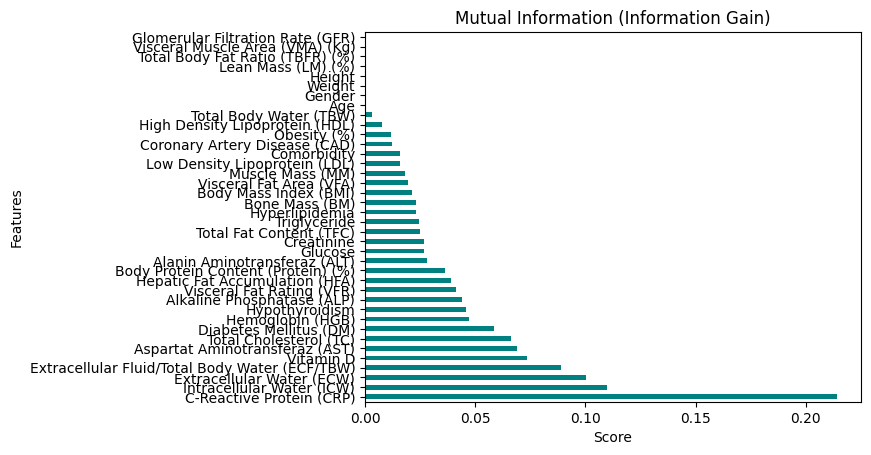

In [120]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

X = df.iloc[:, 1:]
Y = df['Gallstone Status']

mi_scores = mutual_info_classif(X, Y, discrete_features='auto')

mi_series = pd.Series(mi_scores, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)
#taking the top 20 features for better and unbias results.
k = 20
print("Top features based on Mutual Information:")
print(mi_series.head(k))

mi_series.plot(kind='barh', color='teal')
plt.title("Mutual Information (Information Gain)")
plt.xlabel("Score")
plt.ylabel("Features")
plt.show()


chi square

In [121]:
from sklearn.feature_selection import SelectKBest, chi2

chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, Y)
chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns).sort_values(ascending=False)


In [122]:
from sklearn.feature_selection import f_classif

f_selector = SelectKBest(score_func=f_classif, k='all')
f_selector.fit(X, Y)
f_scores = pd.Series(f_selector.scores_, index=X.columns).sort_values(ascending=False)
print(f_scores)


Vitamin D                                         45.673154
C-Reactive Protein (CRP)                          27.385949
Lean Mass (LM) (%)                                17.022706
Total Body Fat Ratio (TBFR) (%)                   16.978389
Bone Mass (BM)                                    15.599719
Hemoglobin (HGB)                                  12.781941
Extracellular Water (ECW)                         10.425070
Total Fat Content (TFC)                            9.451995
Extracellular Fluid/Total Body Water (ECF/TBW)     9.414047
Hyperlipidemia                                     8.532832
High Density Lipoprotein (HDL)                     8.181862
Gender                                             7.647763
Visceral Fat Area (VFA)                            6.374108
Aspartat Aminotransferaz (AST)                     5.876601
Creatinine                                         5.645945
Body Mass Index (BMI)                              4.750322
Total Body Water (TBW)                  

#Wrapper methods -Recursive Feature Elimination (RFE), Sequential Feature Selector



Recursive Feature Elimination (RFE)


In [123]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator, n_features_to_select=20)
rfe.fit(X, Y)
rfe_features = X.columns[rfe.support_]


Sequential feature Selector

In [124]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# Use liblinear (good for small to medium data) and increase max_iter
logreg = LogisticRegression(solver='liblinear', max_iter=1000)

sfs = SequentialFeatureSelector(logreg, n_features_to_select=20, direction='forward')
sfs.fit(X, Y)

sfs_features = X.columns[sfs.get_support()]


#Embedded Methods - Lasso regularization, XGBoost Feature Importance


Lasso Regularisation

In [125]:
from sklearn.linear_model import LogisticRegression

lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
lasso.fit(X, Y)
lasso_features = pd.Series(lasso.coef_[0], index=X.columns)
lasso_features = lasso_features.abs().sort_values(ascending=False).head(20)


XG Boost

In [126]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X, Y)
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)


In [127]:
feature_sets = {
    'Mutual Info': set(mi_series.head(20).index),
    'Chi2': set(chi2_scores.head(20).index),
    'ANOVA': set(f_scores.head(20).index),
    'RFE': set(rfe_features),
    'SFS': set(sfs_features),
    'Lasso': set(lasso_features.index),
    'XGBoost': set(xgb_importances.index)
}

from collections import Counter
from itertools import chain

all_features = list(chain(*feature_sets.values()))
common_count = Counter(all_features)

common_features = {feat: count for feat, count in common_count.items() if count > 3}

sorted_common = sorted(common_features.items(), key=lambda x: x[1], reverse=True)

print("✅ Commonly Selected Features (Sorted by Importance — # of Methods Selected):\n")
for i, (feat, count) in enumerate(sorted_common, start=1):
    print(f"{i}. {feat} — selected in {count} methods")


✅ Commonly Selected Features (Sorted by Importance — # of Methods Selected):

1. Aspartat Aminotransferaz (AST) — selected in 7 methods
2. C-Reactive Protein (CRP) — selected in 7 methods
3. Diabetes Mellitus (DM) — selected in 6 methods
4. Vitamin D — selected in 6 methods
5. Hyperlipidemia — selected in 6 methods
6. Extracellular Fluid/Total Body Water (ECF/TBW) — selected in 5 methods
7. Alkaline Phosphatase (ALP) — selected in 5 methods
8. Hemoglobin (HGB) — selected in 5 methods
9. Body Protein Content (Protein) (%) — selected in 5 methods
10. Extracellular Water (ECW) — selected in 5 methods
11. Intracellular Water (ICW) — selected in 5 methods
12. Total Fat Content (TFC) — selected in 5 methods
13. Creatinine — selected in 5 methods
14. Lean Mass (LM) (%) — selected in 5 methods
15. Bone Mass (BM) — selected in 5 methods
16. Obesity (%) — selected in 4 methods
17. Total Body Water (TBW) — selected in 4 methods
18. Low Density Lipoprotein (LDL) — selected in 4 methods
19. Total B

In [128]:
final_features = [feat for feat, count in sorted_common]
X_final = df[final_features]
y = df['Gallstone Status']

# train-test split 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)


In [129]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

Training + HyperParam tuning

In [130]:
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2']
}

# Grid search 5-fold CV
grid = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [131]:
best_combination = grid.best_estimator_

y_pred = best_combination.predict(X_test)
y_proba = best_combination.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid.best_params_)
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba), 4))


Best Parameters: {'logreg__C': 10, 'logreg__penalty': 'l2'}

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.83      0.75      0.79        32

    accuracy                           0.80        64
   macro avg       0.80      0.80      0.80        64
weighted avg       0.80      0.80      0.80        64

ROC AUC Score: 0.8604


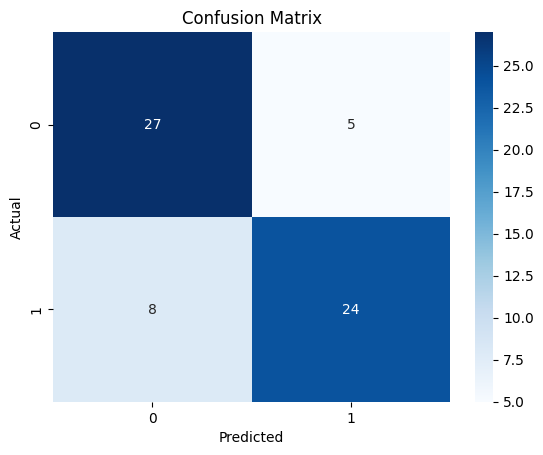

In [132]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Best Parameters: {'logreg__C': 10, 'logreg__penalty': 'l2'}

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.83      *0.75*      0.79        32

    accuracy                           0.80        64
   macro avg       0.80      0.80      0.80        64
weighted avg       0.80      0.80      0.80        64

ROC AUC Score: 0.8643

here the value in * 0.75* is the recall value of 1
1 means - THE PERSON HAS GALLSTONES
Recall is  IDENTIFYING NO. OF CASES OF CLASS 1(True Pos) to the number of total.

RECALL IS 0.75 IT MEANS IN AROUND 25 % CASES ,A PERSON WHO HAS GALLSTONES IS TOLD THAT YOU DO NOT HAVE GALLSTONES , THIS IS RISKY

So, our aim is to increase recall.

In [133]:
X_final = df[final_features]
y = df['Gallstone Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, stratify=y, random_state=42)
model = LogisticRegression(C=1, penalty='l2', solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

print("📋 Classification Report (default threshold 0.5):\n")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_probs):.4f}")


📋 Classification Report (default threshold 0.5):

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.86      0.78      0.82        32

    accuracy                           0.83        64
   macro avg       0.83      0.83      0.83        64
weighted avg       0.83      0.83      0.83        64

ROC AUC Score: 0.8809


In [134]:
y_probs = model.predict_proba(X_test)[:, 1]


In [135]:
threshold = 0.35
y_pred_adj = (y_probs >= threshold).astype(int)


In [136]:
from sklearn.metrics import classification_report, roc_auc_score

print("📋 Adjusted Threshold Classification Report (threshold = 0.35):\n")
print(classification_report(y_test, y_pred_adj))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_probs):.4f}")


📋 Adjusted Threshold Classification Report (threshold = 0.35):

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.80      0.88      0.84        32

    accuracy                           0.83        64
   macro avg       0.83      0.83      0.83        64
weighted avg       0.83      0.83      0.83        64

ROC AUC Score: 0.8809


This threshold reducing to 0.35 made recall 0.84 let us see for threshold as 0.40 also .

In [137]:
y_probs = model.predict_proba(X_test)[:, 1]
threshold = 0.40
y_pred_adj = (y_probs >= threshold).astype(int)


#taken threshold as 0.40 to compare


from sklearn.metrics import classification_report, roc_auc_score

print("📋 Adjusted Threshold Classification Report (threshold = 0.40):\n")
print(classification_report(y_test, y_pred_adj))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_probs):.4f}")

📋 Adjusted Threshold Classification Report (threshold = 0.40):

              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.82      0.84      0.83        32

    accuracy                           0.83        64
   macro avg       0.83      0.83      0.83        64
weighted avg       0.83      0.83      0.83        64

ROC AUC Score: 0.8809


In [138]:
y_probs = model.predict_proba(X_test)[:, 1]
threshold = 0.45
y_pred_adj = (y_probs >= threshold).astype(int)





from sklearn.metrics import classification_report, roc_auc_score

print("📋 Adjusted Threshold Classification Report (threshold = 0.45):\n")
print(classification_report(y_test, y_pred_adj))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_probs):.4f}")

📋 Adjusted Threshold Classification Report (threshold = 0.45):

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.81      0.78      0.79        32

    accuracy                           0.80        64
   macro avg       0.80      0.80      0.80        64
weighted avg       0.80      0.80      0.80        64

ROC AUC Score: 0.8809


SO IT IS CLEAR TO USE 0.40 AS THRESHOLD BECAUSE 0.45 AND 0.35 HAVE LOWER RECALL AND OTHER VALUES .


In [139]:
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.76      0.78      0.77        32
           1       0.77      0.75      0.76        32

    accuracy                           0.77        64
   macro avg       0.77      0.77      0.77        64
weighted avg       0.77      0.77      0.77        64



In [140]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_probs_xgb = xgb.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

print("📋 XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_probs_xgb):.4f}")


📋 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        32
           1       0.89      0.75      0.81        32

    accuracy                           0.83        64
   macro avg       0.84      0.83      0.83        64
weighted avg       0.84      0.83      0.83        64

ROC AUC Score: 0.9004


After performing exploratory data analysis and selecting the most relevant features, I trained multiple classification models to predict gallstone disease.

I started with Logistic Regression, and after tuning its parameters (using regularization and adjusting the probability threshold), it gave strong performance, especially in terms of recall for patients with gallstones, which is important in medical diagnosis.

To compare, I also trained Random Forest and XGBoost models. While XGboost  performed well in terms of ROC score, their recall for class 1 (gallstone cases) was lower than Logistic Regression.

Given the focus on not missing any potential cases, I chose **Logistic Regression** as the final model, since it provided the best balance for this use case after tuning.

In [141]:
y_probs = model.predict_proba(X_test)[:, 1]
threshold = 0.40
y_pred_adj = (y_probs >= threshold).astype(int)





from sklearn.metrics import classification_report, roc_auc_score

print("📋 Adjusted Threshold Classification Report of Logistic Regression Model (threshold = 0.40):\n")
print(classification_report(y_test, y_pred_adj))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_probs):.4f}")

📋 Adjusted Threshold Classification Report of Logistic Regression Model (threshold = 0.40):

              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.82      0.84      0.83        32

    accuracy                           0.83        64
   macro avg       0.83      0.83      0.83        64
weighted avg       0.83      0.83      0.83        64

ROC AUC Score: 0.8809


In [142]:
class ThresholdClassifier:
    def __init__(self, model, threshold=0.40):
        self.model = model
        self.threshold = threshold

    def predict(self, X):
        probs = self.model.predict_proba(X)[:, 1]
        return (probs >= self.threshold).astype(int)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def get_params(self, deep=True):
        return {'model': self.model, 'threshold': self.threshold}


In [143]:
from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression(C=1, penalty='l2', solver='liblinear', class_weight='balanced')
base_model.fit(X_train, y_train)

final_model = ThresholdClassifier(model=base_model, threshold=0.40)


In [144]:
import pickle

with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(final_model, f)


In [145]:
with open("logistic_regression_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

y_pred = loaded_model.predict(X_test)
y_probs = loaded_model.predict_proba(X_test)[:, 1]
print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("📉 Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print(f"🏁 ROC AUC Score: {roc_auc_score(y_test, y_probs):.4f}")



📋 Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.82      0.84      0.83        32

    accuracy                           0.83        64
   macro avg       0.83      0.83      0.83        64
weighted avg       0.83      0.83      0.83        64

📉 Confusion Matrix:

[[26  6]
 [ 5 27]]
🏁 ROC AUC Score: 0.8809
